<a href="https://colab.research.google.com/github/STYLO009/machine_learning/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('amazon.csv')

In [29]:
df.head()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          15000 non-null  object 
 1   Date              15000 non-null  object 
 2   Customer_ID       15000 non-null  object 
 3   Product_Category  15000 non-null  object 
 4   Product_Name      15000 non-null  object 
 5   Quantity          15000 non-null  int64  
 6   Unit_Price_INR    15000 non-null  float64
 7   Total_Sales_INR   15000 non-null  float64
 8   Payment_Method    15000 non-null  object 
 9   Delivery_Status   15000 non-null  object 
 10  Review_Rating     15000 non-null  int64  
 11  Review_Text       15000 non-null  object 
 12  State             15000 non-null  object 
 13  Country           15000 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.6+ MB


In [31]:
df.describe()


,Quantity,Unit_Price_INR,Total_Sales_INR,Review_Rating
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,2.984667,24955.313715,74544.120233,3.040133
std,1.422826,14401.316925,59369.654155,1.411048
min,1.000000,202.570000,204.050000,1.000000
25%,2.000000,12512.937500,27087.852500,2.000000
50%,3.000000,24878.755000,57293.570000,3.000000
75%,4.000000,37496.170000,112188.600000,4.000000
max,5.000000,49994.430000,249955.500000,5.000000


In [32]:
df = df.rename(columns={
    'Total_Sales_INR': 'TS',
    'Unit_Price_INR': 'UnitPrice'
})

print(df.head())


    Order_ID        Date Customer_ID Product_Category  Product_Name  Quantity  \
0  ORD100000  2025-01-25    CUST2796   Home & Kitchen  Cookware Set         2   
1  ORD100001  2025-08-28    CUST9669           Beauty    Hair Dryer         1   
2  ORD100002  2025-02-27    CUST5808      Electronics        Tablet         3   
3  ORD100003  2025-02-24    CUST5889      Electronics    Headphones         5   
4  ORD100004  2025-06-15    CUST9005         Clothing         Saree         5   

   UnitPrice         TS    Payment_Method Delivery_Status  Review_Rating  \
0   25574.41   51148.82       Credit Card        Returned              1   
1   19361.41   19361.41        Debit Card        Returned              5   
2   38476.22  115428.66  Cash on Delivery       Delivered              3   
3   38145.72  190728.60       Credit Card       Delivered              5   
4   45940.98  229704.90               UPI       Delivered              5   

          Review_Text      State Country  
0      Waste 

In [33]:
df.head()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,UnitPrice,TS,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India


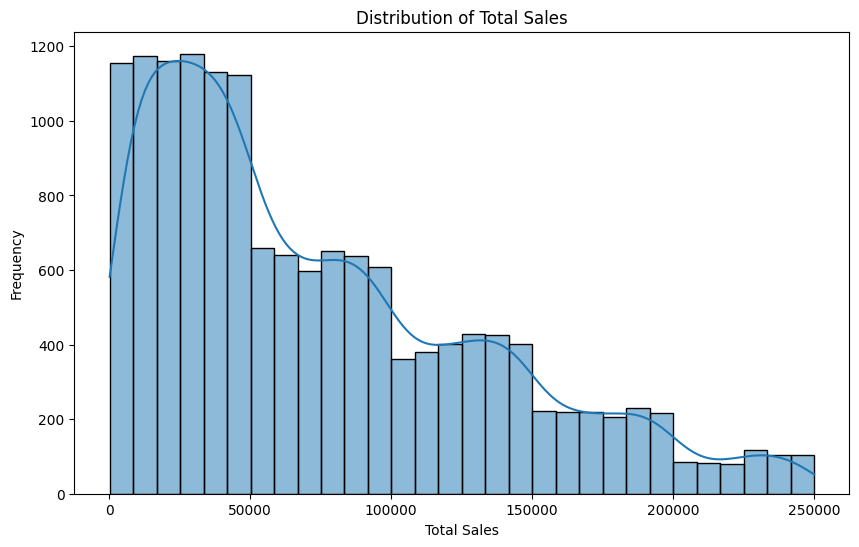

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = 'TS',bins = 30, kde = True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

In [35]:
df_cleaned = df.copy()

In [36]:
df_cleaned.shape

(15000, 14)

In [37]:
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.dropna(inplace=True)

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df.isnull().sum()

,0
Order_ID,0
Date,0
Customer_ID,0
Product_Category,0
Product_Name,0
Quantity,0
UnitPrice,0
TS,0
Payment_Method,0
Delivery_Status,0


In [40]:
df_cleaned

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,UnitPrice,TS,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ORD114995,2025-04-12,CUST2822,Beauty,Lipstick,4,36421.54,145686.16,UPI,Delivered,1,Never buying again,Gujarat,India
14996,ORD114996,2025-08-29,CUST6143,Beauty,Shampoo,4,18158.02,72632.08,Debit Card,Delivered,4,Satisfied with the product,Meghalaya,India
14997,ORD114997,2025-01-27,CUST6747,Books,Science Textbook,1,38864.05,38864.05,UPI,Delivered,1,Waste of money,Sikkim,India
14998,ORD114998,2025-06-21,CUST2748,Beauty,Hair Dryer,3,32658.62,97975.86,Cash on Delivery,Pending,3,Okay product,Himachal Pradesh,India


In [42]:
df_dummy = pd.get_dummies(df_cleaned.select_dtypes(include='object').columns)

In [50]:
bool_columns = df_dummy.select_dtypes(include='object').columns
df_cleaned[bool_columns] = df_cleaned[bool_columns].astype(int)

In [56]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()
df_encode_sparse = encode.fit_transform(df_cleaned)
df_encode_dense = df_encode_sparse.toarray()
print(df_encode_dense[:5])

[[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [57]:
df_encode_sparse

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210000 stored elements and shape (15000, 52694)>

In [63]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

numeric_columns = ['Quantity', 'UnitPrice', 'TS', 'Review_Rating']
for col in numeric_columns:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)


print(f"Original: {df.shape[0]} rows → Cleaned: {df_cleaned.shape[0]} rows")

Original: 15000 rows → Cleaned: 14874 rows


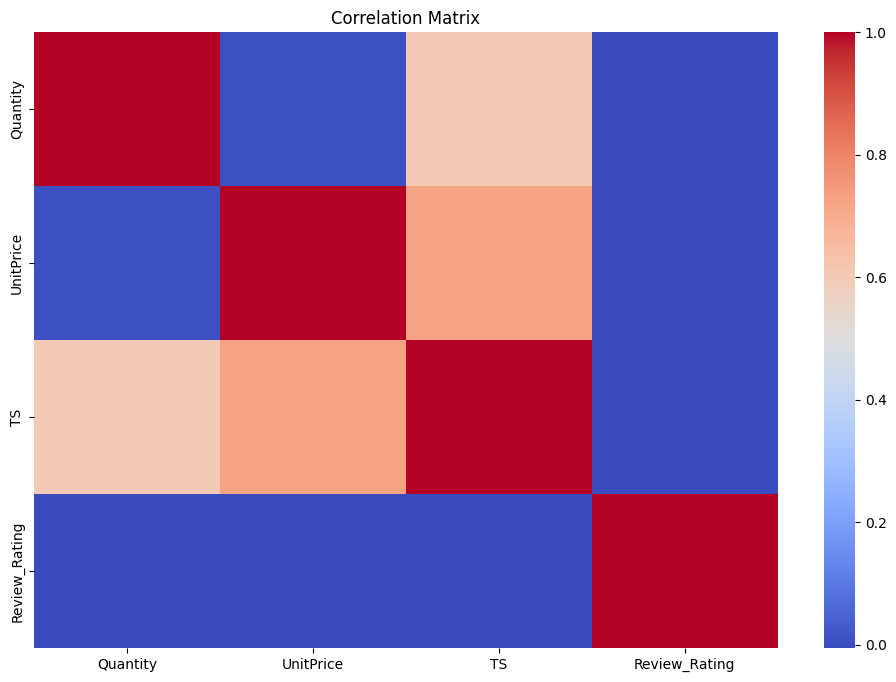

In [65]:
plt.figure(figsize=(12, 8)) # Increased figure size for better visibility
sns.heatmap(df_processed.corr(), annot=False, cmap='coolwarm') # Removed annot=True for potentially large heatmap
plt.title('Correlation Matrix')
plt.show()

In [77]:
# Removed unnecessary Label Encoding

In [72]:
df_cleaned

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,UnitPrice,TS,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country,Customer_ID\t
0,0,2025-01-25,CUST2796,4,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India,1458
1,1,2025-08-28,CUST9669,0,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India,6987
2,2,2025-02-27,CUST5808,3,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India,3881
3,3,2025-02-24,CUST5889,3,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India,3946
4,4,2025-06-15,CUST9005,2,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India,6452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14869,2025-04-12,CUST2822,0,Lipstick,4,36421.54,145686.16,UPI,Delivered,1,Never buying again,Gujarat,India,1482
14996,14870,2025-08-29,CUST6143,0,Shampoo,4,18158.02,72632.08,Debit Card,Delivered,4,Satisfied with the product,Meghalaya,India,4153
14997,14871,2025-01-27,CUST6747,1,Science Textbook,1,38864.05,38864.05,UPI,Delivered,1,Waste of money,Sikkim,India,4630
14998,14872,2025-06-21,CUST2748,0,Hair Dryer,3,32658.62,97975.86,Cash on Delivery,Pending,3,Okay product,Himachal Pradesh,India,1423


In [78]:
X = df_processed.drop('TS', axis=1)
y = df_processed['TS']

In [80]:
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [81]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [82]:
y_pred = model.predict(X_test)
y_pred

array([165979.28951282,  54347.32263822,  41304.4038406 , ...,
         9799.91868375,  96322.60424379, 135566.12776402])

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

0.8753305163358409

In [84]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_Score =  1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2_Score


0.8752056804042679